In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
 # Ml libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Control Display
# pd.option.display.max_columns = 10
# sns.set(style="darkgrid", rc={'axes.facecolor': 'white'})

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load the dataset from
df = pd.read_csv('heart_disease.csv')
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# Get Target value counts for

In [4]:
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

# Show percentage of male and female patients


In [6]:
count_female = len(df[df.sex == 1])
count_male = len(df[df.sex == 0])
count_total = len(df.sex)
print("Percentage of male: {:.2f}%".format(count_male/count_total*100))
print("Percentage of female: {:.2f}%".format(count_female/count_total*100))

Percentage of male: 30.44%
Percentage of female: 69.56%


# Check for mean in target

In [7]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


# Check null values

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# ML for training and testing our dataset
# Create logistic regression model

In [11]:
y = df.target.values
x_data = df.drop('target', axis=1)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y, test_size=0.25, random_state=42)


In [16]:
# Check shape of of the data after splitting the data into train and test set

x_train.shape, x_test.shape

((768, 13), (257, 13))

# Check the datatype


In [17]:
x_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [20]:
# check x_train headers
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
949,57,1,0,132,207,0,1,168,1,0.0,2,0,3
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
94,62,1,1,128,208,1,0,140,0,0.0,2,0,2
33,70,1,2,160,269,0,1,112,1,2.9,1,1,3
259,66,1,0,120,302,0,0,151,0,0.4,1,0,2


In [21]:
# create a decision tree model
ctf = DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=43)
ctf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=43)

In [26]:
# Predict the class labels for the class data using the decision tree classifier
from sklearn.metrics import accuracy_score


y_predict = ctf.predict(x_test)
print("Model accuracy score with criterion:{0:0.4f}". format(accuracy_score(y_test, y_predict)))

Model accuracy score with criterion:0.9767


In [27]:
# Predict the class labels using the decision tree classifier
y_predict = ctf.predict(x_train)
y_predict

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,

In [29]:
# Print the training set of accuracy scores
print('Training set accuracy scores:{0:0.4f}'.format(ctf.score(x_train,y_train)))
print('testing set accuracy scores:{0:0.4f}'.format(ctf.score(x_test,y_test)))

Training set accuracy scores:1.0000
testing set accuracy scores:0.9767


[Text(0.49426605504587157, 0.9545454545454546, 'x[2] <= 0.5\ngini = 0.499\nsamples = 768\nvalue = [367, 401]'),
 Text(0.23394495412844038, 0.8636363636363636, 'x[11] <= 0.5\ngini = 0.378\nsamples = 368\nvalue = [275, 93]'),
 Text(0.13761467889908258, 0.7727272727272727, 'x[12] <= 2.5\ngini = 0.499\nsamples = 162\nvalue = [77, 85]'),
 Text(0.05504587155963303, 0.6818181818181818, 'x[7] <= 119.5\ngini = 0.338\nsamples = 93\nvalue = [20, 73]'),
 Text(0.03669724770642202, 0.5909090909090909, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.07339449541284404, 0.5909090909090909, 'x[8] <= 0.5\ngini = 0.283\nsamples = 88\nvalue = [15, 73]'),
 Text(0.03669724770642202, 0.5, 'x[4] <= 316.5\ngini = 0.067\nsamples = 58\nvalue = [2, 56]'),
 Text(0.01834862385321101, 0.4090909090909091, 'gini = 0.0\nsamples = 55\nvalue = [0, 55]'),
 Text(0.05504587155963303, 0.4090909090909091, 'x[0] <= 61.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.03669724770642202, 0.3181818181818182, 'gini = 0.0\

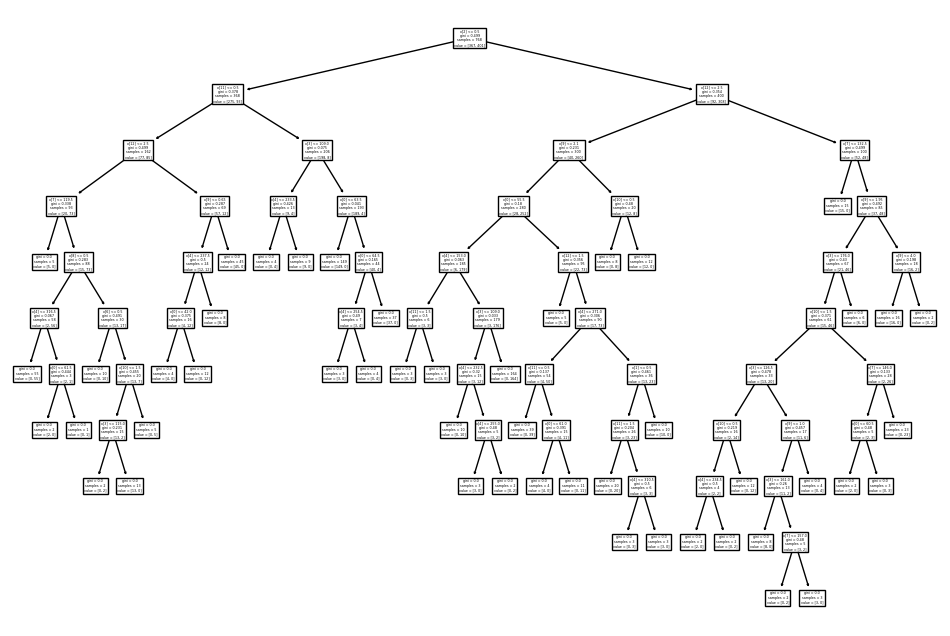

In [35]:
plt.figure(figsize=(12, 8))
tree.plot_tree(ctf.fit(x_train, y_train))

In [3]:
heart_data = pd.read_csv('heart_disease.csv')
y = heart_data['target'].values
x_data = heart_data.drop(['target'], axis=1)

# Now we train the model
model = tree.DecisionTreeClassifier()
model.fit(x_data, y)

# Now we get the class name from the dataset
class_name = heart_data['target'].unique().astype(str)

# Generate the the graphviz visualization
tree.export_graphviz(model, out_file='heart_disease1.dot',
                     feature_names=x_data.columns,
                     class_names=class_name,
                     label= 'all',
                     filled=True, rounded=True)